In [3]:
import pandas as pd

base_turismo = pd.read_excel(
    r"..\bdd\bdd_limpia\base_turismo_clean.xlsx")
base_turismo

,num_noches_durmieron,gasto_alojamiento,gasto_alimentacion,gasto_transporte,gasto_visitas,gasto_discotecas,mes_viaje,principal_actividad1,destino_principal_viaje,gasto_tot
0,0,0,20,0,0,0,Febrero,"Visita a festivales, ferias",Gualaceo,20
1,0,0,100,0,0,0,Diciembre,Visita a playas,Playas,100
2,2,0,60,0,0,0,Enero,Visita a atractivos naturales,Machala,60
3,3,0,15,20,0,0,Febrero,Visita a balnearios,Calvas,35
4,1,0,30,10,0,0,Febrero,Visita a balnearios,Paute,40
...,...,...,...,...,...,...,...,...,...,...
2146,2,0,75,0,0,0,Febrero,Actividades relacionadas con su trabajo,Quito,75
2147,0,0,40,0,0,0,Enero,Visita a atractivos naturales,Loreto,40
2148,3,0,20,32,0,0,Febrero,Visita a balnearios,Machala,52
2149,0,0,0,2,2,2,Febrero,Visita a atractivos históricos,Santo Domingo,6


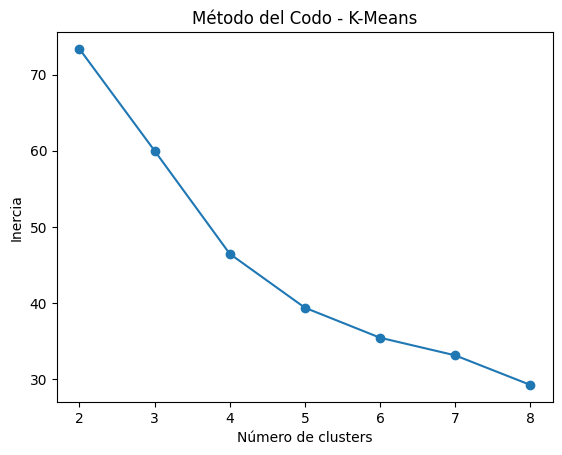

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Selección de variables numéricas
numerical_cols = [
    "num_noches_durmieron",
    "gasto_alojamiento", 
    "gasto_alimentacion",
    "gasto_transporte", 
    "gasto_visitas",
    "gasto_discotecas"
]

X_num = base_turismo[numerical_cols].copy()

# Escalado
scaler_kmeans = MinMaxScaler()
X_num_scaled = scaler_kmeans.fit_transform(X_num)

# Elbow method para K-Means
inertia = []
K = range(2, 9)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_num_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Método del Codo - K-Means")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

# Elegimos un K (ejemplo 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_num_scaled)

base_turismo['cluster_kmeans'] = clusters_kmeans


In [5]:
base_turismo

,num_noches_durmieron,gasto_alojamiento,gasto_alimentacion,gasto_transporte,gasto_visitas,gasto_discotecas,mes_viaje,principal_actividad1,destino_principal_viaje,gasto_tot,cluster_kmeans
0,0,0,20,0,0,0,Febrero,"Visita a festivales, ferias",Gualaceo,20,1
1,0,0,100,0,0,0,Diciembre,Visita a playas,Playas,100,2
2,2,0,60,0,0,0,Enero,Visita a atractivos naturales,Machala,60,1
3,3,0,15,20,0,0,Febrero,Visita a balnearios,Calvas,35,1
4,1,0,30,10,0,0,Febrero,Visita a balnearios,Paute,40,1
...,...,...,...,...,...,...,...,...,...,...,...
2146,2,0,75,0,0,0,Febrero,Actividades relacionadas con su trabajo,Quito,75,1
2147,0,0,40,0,0,0,Enero,Visita a atractivos naturales,Loreto,40,1
2148,3,0,20,32,0,0,Febrero,Visita a balnearios,Machala,52,1
2149,0,0,0,2,2,2,Febrero,Visita a atractivos históricos,Santo Domingo,6,1
